In [8]:
import numpy as np
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(ks)
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1

2.620538882402765

In [2]:
b0 = np.mean(ks) - b1 * np.mean(zp)
b0

444.1773573243596

In [49]:
y_pred = b0 + b1 * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.28513381,
       548.99891262, 627.61507909, 585.68645697, 837.25818969,
       758.64202321, 732.43663439])

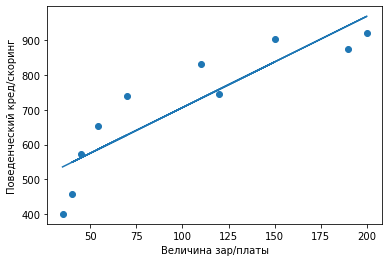

In [50]:
plt.scatter(zp, ks)
plt.xlabel('Величина зар/платы')
plt.ylabel('Поведенческий кред/скоринг', rotation=90)
plt.plot(zp, y_pred)

In [11]:
mse_ = np.sum(((b0 + b1 * zp) - ks) ** 2 / n)
mse_

6470.414201176659

In [12]:
mse_ = ((ks - y_pred)**2).sum() / n
mse_

6470.414201176658

без interсept

In [13]:
zp1 = zp.reshape(1, n)
ks1 = ks.reshape(1, n)
b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
b1

5.88982042013269

In [14]:
y_pred1 = b1 * zp
y_pred1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

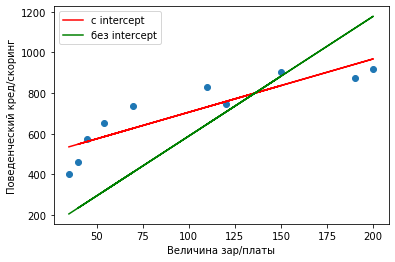

In [16]:
plt.scatter(zp, ks)
plt.xlabel('Величина зар/платы')
plt.ylabel('Поведенческий кред/скоринг', rotation=90)
plt.plot(zp, y_pred, 'r', label = 'с intercept')
plt.plot(zp, y_pred1, 'g', label = 'без interсept')
plt.legend()

In [31]:
import numpy as np
alpha = 1e-6
b1 = 2.620538882402765
n = len(ks)
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
def mse_(b1, x, y):
    return np.sum((b1 * x - y) ** 2) / len(x)
mse_(b1, zp, ks)

203763.93896082853

In [32]:
def mse_p(b1,x,y):
    return (2/len(x))*np.sum((b1*x-y)*x)

In [37]:
alpha = 1e-6
b = 0.1
mse_min = mse_(b, zp, ks)
i_min = 1
b_min = b
iteration = 10000
for i in range(iteration):
    b -= alpha * mse_p(b, zp, ks)
    if i % 100 == 0:
        print(f'>>> Итерация #{i}, b={b}, mse={mse_(b, zp, ks)}')
    if mse_(b, zp, ks) > mse_min:
        print(f'>>> Итерация #{i_min}, b={b_min}, mse={mse_min},\n>>> Достигнут минимум\n>>> Получили {b_min} ')
        break
    else:
        mse_min = mse_(b,zp,ks)
        i_min = i
        b_min = b

>>> Итерация #0, b=0.25952808000000005, mse=493237.7212546963
>>> Итерация #100, b=5.54537842245223, mse=58151.31823171113
>>> Итерация #200, b=5.868748638669329, mse=56522.97550129376
>>> Итерация #300, b=5.888531320728348, mse=56516.88130936019
>>> Итерация #400, b=5.8897415574471985, mse=56516.85850140053
>>> Итерация #500, b=5.889815595583751, mse=56516.858416040064
>>> Итерация #600, b=5.889820124983314, mse=56516.85841572062
>>> Итерация #628, b=5.889820285147628, mse=56516.85841571966,
>>> Достигнут минимум
>>> Получили 5.889820285147628 


In [47]:
alpha = 5e-5

b0 = 0.1
b1 = 0.1

def mse_(b0, b1, y = ks, X = zp, n = 10):
    return np.sum((b0 + b1 * X - y) ** 2) / n
for i in range(1000000):
    y_pred3 = b0 + b1 * zp
    b0 -=alpha * (2 / n) * np.sum((y_pred3 - ks))
    b1 -=alpha * (2 / n) * np.sum((y_pred3 - ks)*zp)
    if i % 100000 == 0:
        print(f"Итерация: {i}, b1 : {b1}, b0 : {b0}, mse: {mse_(b0,b1)}")

Итерация: 0, b1 : 8.07539, b0 : 0.169966, mse: 122360.8044853729
Итерация: 100000, b1 : 2.8791831426087984, b0 : 409.03758503899854, mse: 6783.640544683958
Итерация: 200000, b1 : 2.641007845630212, b0 : 441.39641524523927, mse: 6472.375953981324
Итерация: 300000, b1 : 2.6221587847940984, b0 : 443.9572751113981, mse: 6470.426487736031
Итерация: 400000, b1 : 2.6206670805791092, b0 : 444.1599401401525, mse: 6470.414278128017
Итерация: 500000, b1 : 2.6205490279352976, b0 : 444.1759789380671, mse: 6470.414201658608
Итерация: 600000, b1 : 2.6205396853146192, b0 : 444.177248239628, mse: 6470.414201179677
Итерация: 700000, b1 : 2.620538945944757, b0 : 444.1773486914554, mse: 6470.414201176677
Итерация: 800000, b1 : 2.6205388874314473, b0 : 444.17735664115577, mse: 6470.41420117666
Итерация: 900000, b1 : 2.620538882800784, b0 : 444.1773572702843, mse: 6470.41420117666


In [ ]:
2.620538882402765
444.1773573243596